In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Mortgage Parameters
Mortgage_loan = 700000
Mortgage_rate = 0.095
Service_fee = 0.005  # 0.5% fee (assuming percentage of monthly payment)
Term_of_loan = 360  # 30 years
monthly_interest_rate = Mortgage_rate / 12
monthly_service_rate = Service_fee / 12
# Monthly payment using the loan amortization formula
monthly_payment = (Mortgage_loan * monthly_interest_rate) / (1 - (1 + monthly_interest_rate) ** -Term_of_loan)

# Printing the header of the amortization schedule
print(f"{'Month':<6} {'Beginning Balance':<20} {'Monthly Payment':<20} {'Interest':<15} {'Servicing Fee':<15} {'Principal':<15} {'Ending Balance':<20}")

ending_balance = Mortgage_loan
schedule = []

for month in range(1, Term_of_loan + 1):
    beginning_balance = ending_balance
    interest_payment = beginning_balance * monthly_interest_rate
    servicing_fee = beginning_balance * monthly_service_rate
    principal_payment = monthly_payment - interest_payment
    ending_balance -= principal_payment
    
    if ending_balance < 0:
        ending_balance = 0
    
    print(f"{month:<6} {beginning_balance:<20.2f} {monthly_payment:<20.2f} {interest_payment:<15.2f} {servicing_fee:<15.2f} {principal_payment:<15.2f} {ending_balance:<20.2f}")

    # Save schedule as dict
    schedule.append({
        'Month': month,
        'Beginning Balance': round(beginning_balance, 2),
        'Monthly Mortgage Payment': round(monthly_payment, 2),
        'Interest': round(interest_payment, 2),
        'Servicing Fee': round(servicing_fee, 2),
        'Principal': round(principal_payment, 2),
        'Ending Balance': round(ending_balance, 2)
})
# Convert to DataFrame
df = pd.DataFrame(schedule)


Month  Beginning Balance    Monthly Payment      Interest        Servicing Fee   Principal       Ending Balance      
1      700000.00            5885.98              5541.67         291.67          344.31          699655.69           
2      699655.69            5885.98              5538.94         291.52          347.04          699308.65           
3      699308.65            5885.98              5536.19         291.38          349.79          698958.86           
4      698958.86            5885.98              5533.42         291.23          352.56          698606.31           
5      698606.31            5885.98              5530.63         291.09          355.35          698250.96           
6      698250.96            5885.98              5527.82         290.94          358.16          697892.80           
7      697892.80            5885.98              5524.98         290.79          360.99          697531.81           
8      697531.81            5885.98              5522.13

In [3]:
df= df.set_index('Month')
df

,Beginning Balance,Monthly Mortgage Payment,Interest,Servicing Fee,Principal,Ending Balance
Month,,,,,,
1,700000.00,5885.98,5541.67,291.67,344.31,699655.69
2,699655.69,5885.98,5538.94,291.52,347.04,699308.65
3,699308.65,5885.98,5536.19,291.38,349.79,698958.86
4,698958.86,5885.98,5533.42,291.23,352.56,698606.31
5,698606.31,5885.98,5530.63,291.09,355.35,698250.96
...,...,...,...,...,...,...
356,28743.65,5885.98,227.55,11.98,5658.43,23085.22
357,23085.22,5885.98,182.76,9.62,5703.22,17382.00
358,17382.00,5885.98,137.61,7.24,5748.37,11633.63


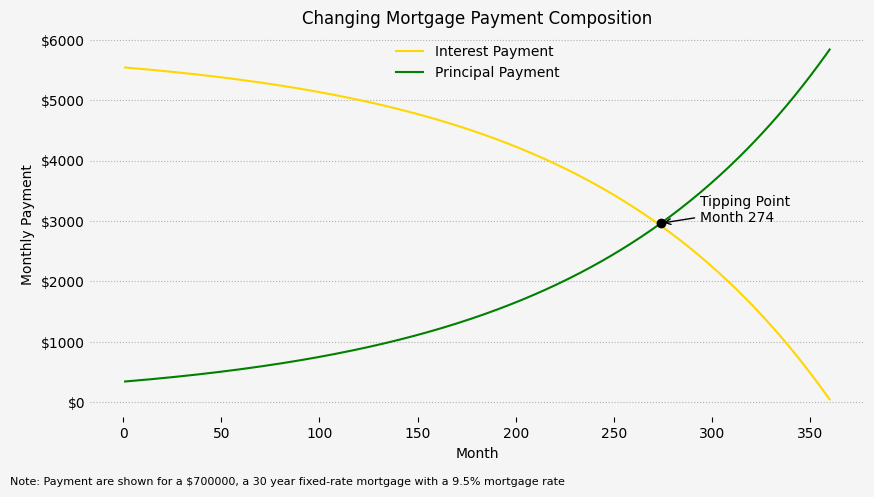

In [31]:
tipping_point = df[df['Principal'] > df['Interest']].index[0]
tipping_principal = df.loc[tipping_point, 'Principal']
tipping_interest = df.loc[tipping_point, 'Interest']

fig, ax = plt.subplots(figsize=(10,5)) 
fig.patch.set_facecolor("whitesmoke")
ax.set_facecolor("whitesmoke")

ax.plot(df.index,df['Interest'], color='gold',label='Interest Payment')  
ax.plot(df.index, df['Principal'], color='green',label='Principal Payment')  


ax.scatter(tipping_point, tipping_principal, color='black', zorder=5)  
ax.annotate(f"Tipping Point\nMonth {tipping_point}", 
            (tipping_point, tipping_principal), 
            xytext=(tipping_point+20, tipping_principal+20),
            arrowprops=dict(arrowstyle="->", color="black"))

# Labels

plt.title('Changing Mortgage Payment Composition', fontsize=12, color='black')
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Payment')
ax.legend(frameon=False, loc='upper center', ncol=1)

fig.text(0.60, -0.03, "Note: Payment are shown for a $700000, a 30 year fixed-rate mortgage with a 9.5% mortgage rate", 
         ha='right', va='bottom', fontsize=8, color='black')

ax.tick_params(axis='y', length=0)
ax.yaxis.set_major_formatter('${x:1.0f}')
sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle=':', linewidth=0.8)
plt.show()